# Analyse university contact networks

In [1]:
import networkx as nx
from os.path import join
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
src = '../data/networks'

In [3]:
G_all = nx.readwrite.gpickle.read_gpickle(\
        join(src, 'university_2019-10-16_to_2019-10-23_fraction-1_all.bz2')) 
G_TU = nx.readwrite.gpickle.read_gpickle(\
        join(src, 'university_2019-10-16_to_2019-10-23_fraction-1_TU.bz2'))
G_NaWi = nx.readwrite.gpickle.read_gpickle(\
        join(src, 'university_2019-10-16_to_2019-10-23_fraction-1_NaWi.bz2'))

## Number of agents

In [6]:
N_students_all = len([n for n in G_all.nodes(data=True) if n[1]['type'] == 'unistudent'])
N_lecturers_all = len([n for n in G_all.nodes(data=True) if n[1]['type'] == 'lecturer'])
print('Full network: {} students, {} lecturers'.format(N_students_all, N_lecturers_all))

Full network: 10755 students, 974 lecturers


In [7]:
N_students_TU = len([n for n in G_TU.nodes(data=True) if n[1]['type'] == 'unistudent'])
N_lecturers_TU = len([n for n in G_TU.nodes(data=True) if n[1]['type'] == 'lecturer'])
print('TU only network: {} students, {} lecturers'.format(N_students_TU, N_lecturers_TU))

TU only network: 8103 students, 923 lecturers


In [8]:
N_students_NaWi = len([n for n in G_NaWi.nodes(data=True) if n[1]['type'] == 'unistudent'])
N_lecturers_NaWi = len([n for n in G_NaWi.nodes(data=True) if n[1]['type'] == 'lecturer'])
print('NaWi only network: {} students, {} lecturers'.format(N_students_NaWi, N_lecturers_NaWi))

NaWi only network: 2675 students, 533 lecturers


## Average node degree

In [9]:
weekdays = {1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday',
            5:'Friday', 6:'Saturday', 7:'Sunday'}

In [10]:
degree_df_all = pd.DataFrame()
weekday_connections = {}
all_edges = G_all.edges(keys=True, data='weekday')

for j in range(1, 8):
    wd_edges = [(u, v, k) for (u, v, k, wd) in all_edges if wd == j]
    G_wd = G_all.edge_subgraph(wd_edges).copy()

    students = [x for x,y in G_wd.nodes(data=True) if y['type'] == 'unistudent']
    lecturers = [x for x,y in G_wd.nodes(data=True) if y['type'] == 'lecturer']

    student_degree = np.asarray([G_wd.degree(s) for s in students]).mean()
    lecturer_degree = np.asarray([G_wd.degree(t) for t in lecturers]).mean()

    degree_df_all = degree_df_all.append({
        'weekday':weekdays[j],
        'student_degree':student_degree,
        'lecturer_degree':lecturer_degree,
    }, ignore_index=True)
            

<ipython-input-10-ca7d4cd14656>:12: RuntimeWarning: Mean of empty slice.
  student_degree = np.asarray([G_wd.degree(s) for s in students]).mean()
/home/jana/anaconda3/envs/covid/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-10-ca7d4cd14656>:13: RuntimeWarning: Mean of empty slice.
  lecturer_degree = np.asarray([G_wd.degree(t) for t in lecturers]).mean()


In [11]:
degree_df_all.drop([5, 6])['student_degree'].mean()

19.81620442857372

In [12]:
degree_df_all.drop([5, 6])['lecturer_degree'].mean()

35.403474556988854

In [13]:
degree_df_TU = pd.DataFrame()
weekday_connections = {}
all_edges = G_TU.edges(keys=True, data='weekday')

for j in range(1, 8):
    wd_edges = [(u, v, k) for (u, v, k, wd) in all_edges if wd == j]
    G_wd = G_TU.edge_subgraph(wd_edges).copy()

    students = [x for x,y in G_wd.nodes(data=True) if y['type'] == 'unistudent']
    lecturers = [x for x,y in G_wd.nodes(data=True) if y['type'] == 'lecturer']

    student_degree = np.asarray([G_wd.degree(s) for s in students]).mean()
    lecturer_degree = np.asarray([G_wd.degree(t) for t in lecturers]).mean()

    degree_df_TU = degree_df_TU.append({
        'weekday':weekdays[j],
        'student_degree':student_degree,
        'lecturer_degree':lecturer_degree,
    }, ignore_index=True)
            

<ipython-input-13-914ee03f3e81>:12: RuntimeWarning: Mean of empty slice.
  student_degree = np.asarray([G_wd.degree(s) for s in students]).mean()
<ipython-input-13-914ee03f3e81>:13: RuntimeWarning: Mean of empty slice.
  lecturer_degree = np.asarray([G_wd.degree(t) for t in lecturers]).mean()


In [14]:
degree_df_TU.drop([5, 6])['student_degree'].mean()

20.735638749215457

In [15]:
degree_df_TU.drop([5, 6])['lecturer_degree'].mean()

32.364364042254195

In [16]:
degree_df_NaWi = pd.DataFrame()
weekday_connections = {}
all_edges = G_NaWi.edges(keys=True, data='weekday')

for j in range(1, 8):
    wd_edges = [(u, v, k) for (u, v, k, wd) in all_edges if wd == j]
    G_wd = G_NaWi.edge_subgraph(wd_edges).copy()

    students = [x for x,y in G_wd.nodes(data=True) if y['type'] == 'unistudent']
    lecturers = [x for x,y in G_wd.nodes(data=True) if y['type'] == 'lecturer']

    student_degree = np.asarray([G_wd.degree(s) for s in students]).mean()
    lecturer_degree = np.asarray([G_wd.degree(t) for t in lecturers]).mean()

    degree_df_NaWi = degree_df_NaWi.append({
        'weekday':weekdays[j],
        'student_degree':student_degree,
        'lecturer_degree':lecturer_degree,
    }, ignore_index=True)
            

<ipython-input-16-4f6dc0484a71>:12: RuntimeWarning: Mean of empty slice.
  student_degree = np.asarray([G_wd.degree(s) for s in students]).mean()
<ipython-input-16-4f6dc0484a71>:13: RuntimeWarning: Mean of empty slice.
  lecturer_degree = np.asarray([G_wd.degree(t) for t in lecturers]).mean()


In [17]:
degree_df_NaWi.drop([5, 6])['student_degree'].mean()

13.748206455010575

In [18]:
degree_df_NaWi.drop([5, 6])['lecturer_degree'].mean()

12.553249363124744

## Degree distributions

In [27]:
# get each node's degree on Monday
all_edges = G_all.edges(keys=True, data='weekday')
wd_edges = [(u, v, k) for (u, v, k, wd) in all_edges if wd == 1]
G_wd = G_all.edge_subgraph(wd_edges).copy()
students_all = np.asarray([G_wd.degree(x) for x,y in G_wd.nodes(data=True) if y['type'] == 'unistudent'])
lecturers_all = np.asarray([G_wd.degree(x) for x,y in G_wd.nodes(data=True) if y['type'] == 'lecturer'])

all_edges = G_TU.edges(keys=True, data='weekday')
wd_edges = [(u, v, k) for (u, v, k, wd) in all_edges if wd == 1]
G_wd = G_TU.edge_subgraph(wd_edges).copy()
students_TU = np.asarray([G_wd.degree(x) for x,y in G_wd.nodes(data=True) if y['type'] == 'unistudent'])
lecturers_TU = np.asarray([G_wd.degree(x) for x,y in G_wd.nodes(data=True) if y['type'] == 'lecturer'])

all_edges = G_NaWi.edges(keys=True, data='weekday')
wd_edges = [(u, v, k) for (u, v, k, wd) in all_edges if wd == 1]
G_wd = G_NaWi.edge_subgraph(wd_edges).copy()
students_NaWi = np.asarray([G_wd.degree(x) for x,y in G_wd.nodes(data=True) if y['type'] == 'unistudent'])
lecturers_NaWi = np.asarray([G_wd.degree(x) for x,y in G_wd.nodes(data=True) if y['type'] == 'lecturer'])

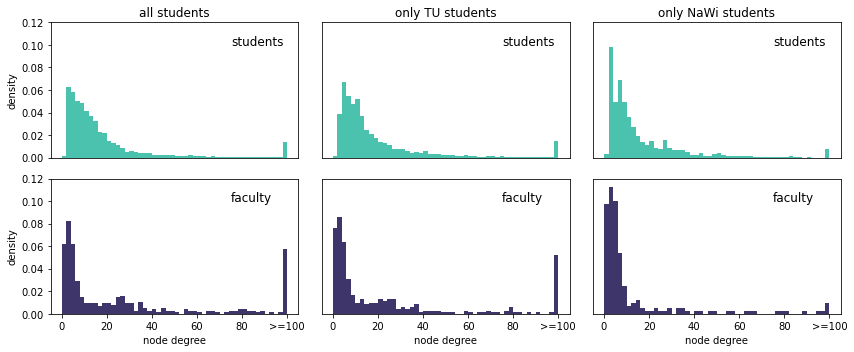

In [60]:
dst = '../plots'

fig, axes = plt.subplots(2, 3, figsize=(12, 5))
cutoff = 100
cmap = sns.color_palette("mako", as_cmap=True)
c1 = cmap(0.75)
c2 = cmap(0.25)

ax = axes[0][0]
degrees_all_masked = np.where(students_all > cutoff, cutoff, students_all)
ax.hist(degrees_all_masked, bins=range(0, cutoff + 1, 2), density=True, color=c1)
ax.set_ylabel('density')
ax.set_title('all students')

ax = axes[0][1]
degrees_TU_masked = np.where(students_TU > cutoff, cutoff, students_TU)
ax.hist(degrees_TU_masked, bins=range(0, cutoff + 1, 2), density=True, color=c1)
ax.set_title('only TU students')

ax = axes[0][2]
degrees_NaWi_masked = np.where(students_NaWi > cutoff, cutoff, students_NaWi)
ax.hist(degrees_NaWi_masked, bins=range(0, cutoff + 1, 2), density=True, color=c1)
ax.set_title('only NaWi students')

for ax in axes[0]:
    ax.set_xticks([])
    ax.set_ylim(0, 0.12)
    ax.text(75, 0.1, 'students', fontsize=12)

ax = axes[1][0]
degrees_all_masked = np.where(lecturers_all > cutoff, cutoff, lecturers_all)
ax.hist(degrees_all_masked, bins=range(0, cutoff + 1, 2), density=True, color=c2)
ax.set_ylabel('density')

ax = axes[1][1]
degrees_TU_masked = np.where(lecturers_TU > cutoff, cutoff, lecturers_TU)
ax.hist(degrees_TU_masked, bins=range(0, cutoff + 1, 2), density=True, color=c2)

ax = axes[1][2]
degrees_NaWi_masked = np.where(lecturers_NaWi > cutoff, cutoff, lecturers_NaWi)
ax.hist(degrees_NaWi_masked, bins=range(0, cutoff + 1, 2), density=True, color=c2)


for ax in axes[1]:
    ax.set_xticks(range(0, cutoff + 1, 20))
    ax.set_xticklabels([0, 20, 40, 60, 80, '>=100'])
    ax.set_xlabel('node degree')
    ax.set_ylim(0, 0.12)
    ax.text(75, 0.10, 'faculty', fontsize=12)
    
for ax in axes[0][1:]:
    ax.set_yticks([])
for ax in axes[1][1:]:
    ax.set_yticks([])


fig.tight_layout()
plt.savefig(join(dst, 'degree_distributios.eps'))

## Percentage of agents and dates

In [123]:
src = '../data/processed'
students = pd.read_csv('../data/processed/students_processed.csv')
students_raw = pd.read_csv('../data/raw/Grunddaten-Simulation/Studierende_pro_LV_mit_Idf.csv')
students_raw = students_raw.rename(columns={
    'ST_PERSON_NR':'student_id', # unique student identifier
    'STP_SP_NR':'lecture_id', # unique lecture identifier
    'LV_GRP_NR':'group_id', # (almost) unique group identifier 
    'STUDIENIDENTIFIKATOR':'study_id'}) # unique study identifier

In [118]:
N_students_raw = len(students_raw['student_id'].unique())
print('{} unique students were active in WiSe 2019/20'.format(N1))

print('{} ({:1.2f}%) unique students remain in the network'\
      .format(N_students_all, N_students_all/N_students_raw * 100))

12710 unique students were active in WiSe 2019/20
10755 (84.62%) unique students remain in the network


In [136]:
dates = pd.read_csv('../data/processed/dates_all_students.csv')
N_dates_raw = len(dates[dates['lecture_id'].isin(students_raw['lecture_id'])])
students_all = [n[0] for n in G_all.nodes(data=True) if n[1]['type'] == 'unistudent']
students_processed = students[students['student_id'].isin(students_all)]
N_dates_processed = len(dates[dates['lecture_id'].isin(students_processed['lecture_id'])])
print('{}/{} ({:1.2f}%) dates remain in the network'\
    .format(N_dates_raw, N_dates_processed, N_dates_processed/N_dates_raw * 100))

25379/24924 (98.21%) dates remain in the network


## Network modularity

In [65]:
from networkx.algorithms.community.modularity_max import greedy_modularity_communities
from networkx.algorithms.community.quality import modularity

In [63]:
partition = greedy_modularity_communities(G_all)

In [67]:
modularity(G_all, partition)

0.5981080609254139

## Export network as node- and edgelist

In [5]:
nx.readwrite.edgelist.write_edgelist(G_all, "../data/networks/university_2019-10-16_to_2019-10-23_fraction-1_all_edgelist.csv")

In [14]:
nodelist = pd.DataFrame()
for n in G_all.nodes(data=True):
    node_data = {"ID":n[0]}
    node_data.update(n[1])
    nodelist = nodelist.append(node_data, ignore_index=True)
    
nodelist = nodelist.drop(columns=["unit"])
nodelist["ID"] = nodelist["ID"].astype(int)
nodelist.to_csv("../data/networks/university_2019-10-16_to_2019-10-23_fraction-1_all_nodelist.csv")